In [1]:
import numpy as np
import pandas as pd
import chardet
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
from scipy import stats

sns.set(rc={'figure.figsize':(20, 10)})

In [2]:
with open('EDO_SampleData.csv', 'rb') as f:
    result = chardet.detect(f.read())
    
data = pd.read_csv('EDO_SampleData.csv', encoding=result['encoding'])
useful_columns = ['Entity Name', 'Network', 'Show Title', 'Show Genre', 'Show Sub Genre', 'Duration', 'Daypart (ET)', 'New Episode', 'Live Event', 'Special Event', 'Pod ABMYZ', 'Creative SER']
data1 = data[useful_columns].dropna(axis=0)

In [4]:
np.unique(data1['Network'])

array(['A&E', 'ABC', 'AMC', 'Adult Swim', 'Animal Planet', 'BBC America',
       'BET', 'BET Her', 'BRAVO', 'CBS', 'CMTV', 'CNBC', 'CNN', 'CW',
       'Cartoon Network', 'Comedy Central', 'DIY', 'Discovery Channel',
       'Disney Channel', 'Disney XD', 'E!', 'ESPN', 'ESPN Classic',
       'ESPN Deportes', 'ESPN News', 'ESPN2', 'FOX', 'FX', 'FXDEP', 'FXX',
       'Food Network', 'Fox News', 'Fox Sports 1', 'Freeform', 'Fuse',
       'Game Show', 'Golf', 'HGTV', 'Hallmark', 'Headline News',
       'History Channel', 'Independent Film (IFC)',
       'Investigation Discovery', 'Lifetime', 'Lifetime Movie Network',
       'MSNBC', 'MTV', 'MTV2', 'NBA TV', 'NBC', 'NBC Sports',
       'NBC Universo', 'National Geographic', 'Nick', 'Nick Toons',
       'Nick at Nite', 'OXYGEN', 'Oprah Winfrey Network',
       'PBS Kids Sprout', 'POP', 'Paramount Network', 'SYFY',
       'Science Channel', 'TBS', 'TLC', 'TNT', 'TV LAND', 'TV ONE',
       'Teen Nick', 'Telemundo', 'USA Network', 'Univision', 'V

In [9]:
len(np.unique(data1['Network']))

76

In [10]:
# Partition of the network data:
Major_networks = ['ABC', 'NBC', 'CW', 'CBS', 'FOX']
Sport_networks = ['ESPN', 'ESPN Classic', 'ESPN Deportes', 'ESPN News', 'ESPN2', 'Fox Sports 1', 'Golf', 
                  'NBA TV', 'NBC Sports']
News_networks = ['Fox News', 'Headline News']


In [11]:
len(data1[data1['Network'].isin(Major_networks)])

51

In [12]:
len(data1[data1['Network'].isin(Sport_networks)])

142

In [13]:
len(data1[data1['Network'].isin(News_networks)])

6

In [14]:
count_plot = data1[['Network', 'Creative SER']].groupby(['Network']).agg(['mean','count'])['Creative SER']['count'].sort_values(ascending=False)

In [15]:
count_plot

Network
Comedy Central             66
USA Network                52
BET                        49
E!                         46
TBS                        45
FX                         40
ESPN Classic               40
BRAVO                      39
Disney Channel             38
ESPN                       38
MTV                        37
Disney XD                  37
VH1                        37
TNT                        36
Telemundo                  36
Discovery Channel          35
Paramount Network          30
History Channel            30
Cartoon Network            29
Adult Swim                 29
Freeform                   26
Nick at Nite               24
SYFY                       23
TV ONE                     22
AMC                        21
OXYGEN                     20
NBC                        20
Lifetime                   19
Univision                  18
ESPN Deportes              17
                           ..
Animal Planet               8
Investigation Discovery     8
A&

In [19]:
list(count_plot.index[0:20])

['Comedy Central',
 'USA Network',
 'BET',
 'E!',
 'TBS',
 'FX',
 'ESPN Classic',
 'BRAVO',
 'Disney Channel',
 'ESPN',
 'MTV',
 'Disney XD',
 'VH1',
 'TNT',
 'Telemundo',
 'Discovery Channel',
 'Paramount Network',
 'History Channel',
 'Cartoon Network',
 'Adult Swim']

In [21]:
stats.f_oneway([1,2,3,3,4,5], [2,3,4,5,6,7])

F_onewayResult(statistic=2.4545454545454546, pvalue=0.14825437428814867)

In [29]:
comedy_central = data1.loc[data1['Network'] == 'Comedy Central', 'Creative SER']
USA_network = data1.loc[data1['Network'] == 'USA Network', 'Creative SER']
BET = data1.loc[data1['Network'] == 'BET', 'Creative SER']
E = data1.loc[data1['Network'] == 'E!', 'Creative SER']
TBS = data1.loc[data1['Network'] == 'TBS', 'Creative SER']
FX = data1.loc[data1['Network'] == 'FX', 'Creative SER']
ESPN_classic = data1.loc[data1['Network'] == 'ESPN Classic', 'Creative SER']
BRAVO = data1.loc[data1['Network'] == 'BRAVO', 'Creative SER']
disney_channel = data1.loc[data1['Network'] == 'Disney Channel', 'Creative SER']
ESPN = data1.loc[data1['Network'] == 'ESPN', 'Creative SER']
MTV = data1.loc[data1['Network'] == 'MTV', 'Creative SER']
Disney_XD = data1.loc[data1['Network'] == 'Disney XD', 'Creative SER']
VH1 = data1.loc[data1['Network'] == 'VH1', 'Creative SER']
TNT = data1.loc[data1['Network'] == 'TNT', 'Creative SER']
Telemundo = data1.loc[data1['Network'] == 'Telemundo', 'Creative SER']
discovery_channel = data1.loc[data1['Network'] == 'Discovery Channel', 'Creative SER']
paramount_network = data1.loc[data1['Network'] == 'Paramount Network', 'Creative SER']
history_hannel = data1.loc[data1['Network'] == 'History Channel', 'Creative SER']
cartoon_network = data1.loc[data1['Network'] == 'Cartoon Network', 'Creative SER']
adult_swim = data1.loc[data1['Network'] == 'Adult Swim', 'Creative SER']

In [39]:
stats.f_oneway(np.log(comedy_central), np.log(USA_network), np.log(BET), np.log(E), np.log(TBS), np.log(FX), np.log(ESPN_classic), np.log(BRAVO), np.log(disney_channel), np.log(ESPN), np.log(MTV), np.log(Disney_XD),
              np.log(VH1), np.log(TNT), np.log(Telemundo), np.log(discovery_channel), np.log(paramount_network), np.log(history_hannel), np.log(cartoon_network), np.log(adult_swim))

F_onewayResult(statistic=1.8671332921171597, pvalue=0.013726250547443749)

/anaconda/envs/general/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda/envs/general/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


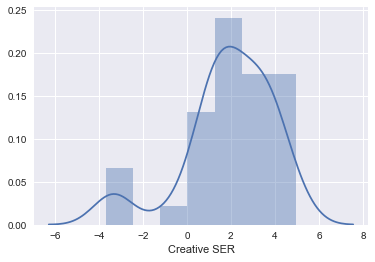

In [46]:
sns.distplot(np.log(Disney_XD))

/anaconda/envs/general/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda/envs/general/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


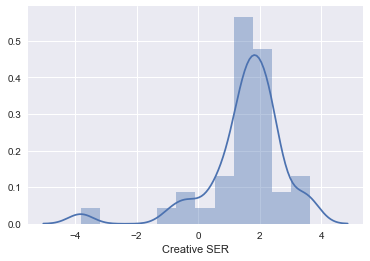

In [45]:
sns.distplot(np.log(MTV))

/anaconda/envs/general/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda/envs/general/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


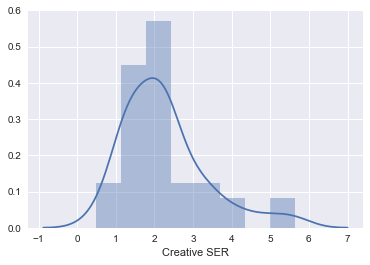

In [44]:
sns.distplot(np.log(ESPN))

/anaconda/envs/general/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda/envs/general/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


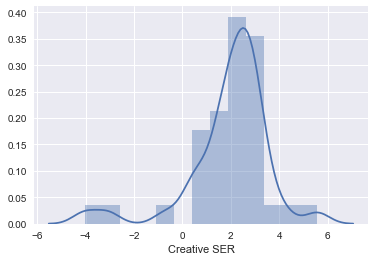

In [43]:
sns.distplot(np.log(disney_channel))

/anaconda/envs/general/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda/envs/general/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


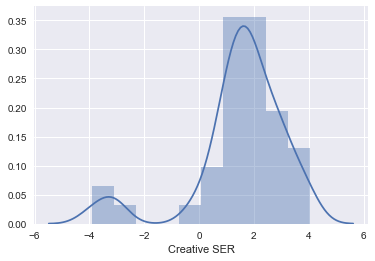

In [42]:
sns.distplot(np.log(BRAVO))

/anaconda/envs/general/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda/envs/general/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


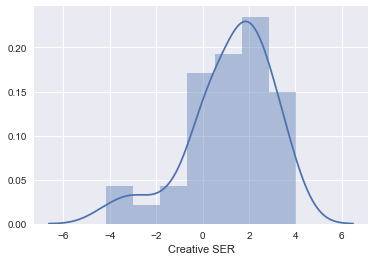

In [41]:
sns.distplot(np.log(ESPN_classic))

/anaconda/envs/general/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda/envs/general/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


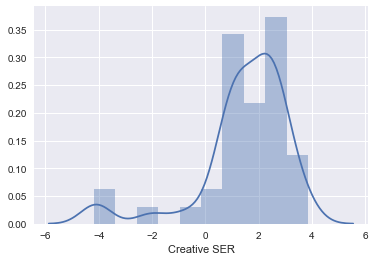

In [40]:
sns.distplot(np.log(FX))

/anaconda/envs/general/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda/envs/general/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


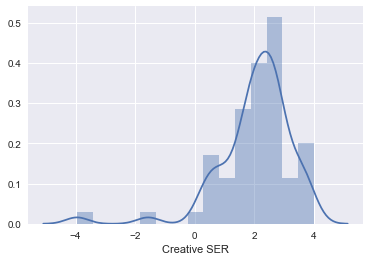

In [37]:
sns.distplot(np.log(comedy_central))

/anaconda/envs/general/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda/envs/general/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


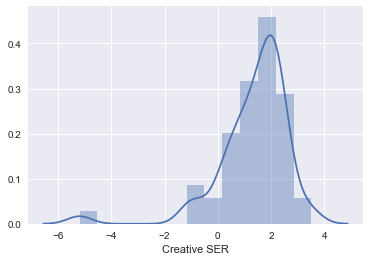

In [36]:
sns.distplot(np.log(USA_network))

/anaconda/envs/general/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda/envs/general/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


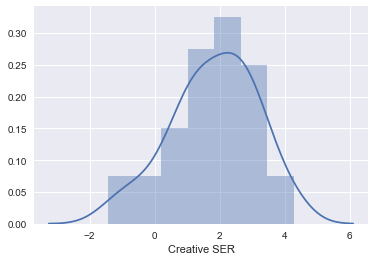

In [38]:
sns.distplot(np.log(BET))